In [1]:
from google.colab import files
files.upload()


Saving house_prices.csv to house_prices.csv


{'house_prices.csv': b'Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price\r\nPROP0001,3712,4,3,36,Rural,House,22260000\r\nPROP0002,1591,4,1,35,Suburb,House,16057500\r\nPROP0003,1646,4,3,20,Rural,Villa,12730000\r\nPROP0004,4814,1,2,13,City Center,Villa,50840000\r\nPROP0005,800,4,2,38,Suburb,Apartment,10650000\r\nPROP0006,4318,3,1,6,Rural,House,24790000\r\nPROP0007,2705,1,3,13,Rural,House,15375000\r\nPROP0008,3128,5,3,19,City Center,Villa,42380000\r\nPROP0009,4824,5,2,23,Suburb,Villa,43455000\r\nPROP0010,2300,1,1,12,City Center,House,24800000\r\nPROP0011,4977,1,3,10,Rural,Villa,26885000\r\nPROP0012,1103,5,1,46,City Center,House,17430000\r\nPROP0013,4522,4,1,12,City Center,Apartment,53020000\r\nPROP0014,1815,3,1,20,Suburb,House,17362500\r\nPROP0015,810,1,2,6,Suburb,House,8625000\r\nPROP0016,4543,1,1,14,Suburb,Villa,35272500\r\nPROP0017,4958,1,2,5,Rural,Villa,26540000\r\nPROP0018,3392,4,1,9,Suburb,Apartment,31515000\r\nPROP0019,1128,5,2,33,Suburb,Apartment,14985000\r\nPRO

In [2]:
import pandas as pd

df = pd.read_csv("house_prices.csv")
df.head()


,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [3]:
df.shape


(300, 8)

In [4]:
df.columns


Index(['Property_ID', 'Area', 'Bedrooms', 'Bathrooms', 'Age', 'Location',
       'Property_Type', 'Price'],
      dtype='object')

In [5]:
df.isnull().sum()


,0
Property_ID,0
Area,0
Bedrooms,0
Bathrooms,0
Age,0
Location,0
Property_Type,0
Price,0


In [6]:
X = df.drop("Price", axis=1)
y = df["Price"]

X.head(), y.head()


(  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type
 0    PROP0001  3712         4          3   36        Rural         House
 1    PROP0002  1591         4          1   35       Suburb         House
 2    PROP0003  1646         4          3   20        Rural         Villa
 3    PROP0004  4814         1          2   13  City Center         Villa
 4    PROP0005   800         4          2   38       Suburb     Apartment,
 0    22260000
 1    16057500
 2    12730000
 3    50840000
 4    10650000
 Name: Price, dtype: int64)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((240, 7), (60, 7))

In [8]:
X = pd.get_dummies(X, drop_first=True)

X.head()


,Area,Bedrooms,Bathrooms,Age,Property_ID_PROP0002,Property_ID_PROP0003,Property_ID_PROP0004,Property_ID_PROP0005,Property_ID_PROP0006,Property_ID_PROP0007,...,Property_ID_PROP0295,Property_ID_PROP0296,Property_ID_PROP0297,Property_ID_PROP0298,Property_ID_PROP0299,Property_ID_PROP0300,Location_Rural,Location_Suburb,Property_Type_House,Property_Type_Villa
0,3712,4,3,36,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,1591,4,1,35,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,1646,4,3,20,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,4814,1,2,13,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,800,4,2,38,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)

y_pred[:5]


array([16027440.58835226, 18916367.2362597 , 48016549.68941486,
       27401189.53880025, 22207756.38956505])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

mae, mse, r2


(2356914.2878653887, 9321646434831.658, 0.9345471804672836)

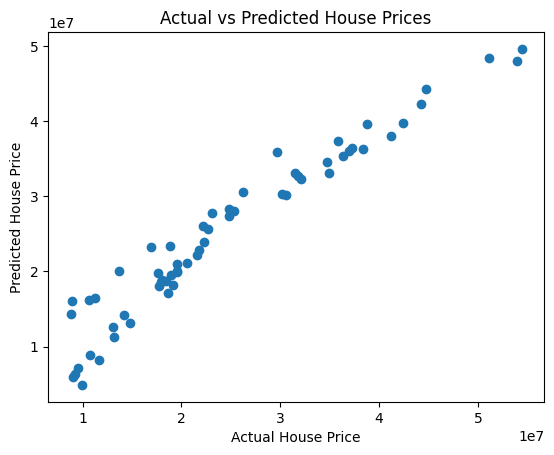

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Actual vs Predicted Analysis

The scatter plot compares actual house prices with predicted prices
generated by the Linear Regression model.

Most data points lie close to the diagonal line, indicating that the model
is able to predict house prices accurately.

This shows that the model has learned the relationship between house features
and price effectively.
